Autores: Enrique Juliá, Leo Pérez y Sara Verde

# Proyecto 1 de Aprendizaje Automático

**Using the 'Wisconsin Diagnostic Breast Cancer' employed in the previous PCA notebook, the students will perform the following tasks:**

**a) Read the dataset;**

**b) Perform a PCA analysis over the data;**

**c) Project the data into the PC space;**

**d) Apply both k-means and GMM over the projected data;**

**e) Compare the obtained clusters with the real labels.**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

### **a) Read the dataset**

El conjunto de datos utilizado es la "Wisconsin Diagnostic Breast Cancer Database", en la que se encuentran recogidas las características de un cierto número de tumores de mama y su clasificación en tumores benignos y malignos.

In [2]:
# Cargamos los datos
wdbc = pd.read_csv('./wdbc.csv', header = None)
# Vemos cuáles son las dimensiones de la tabla para hacernos una idea de cuántos datos tenemos
wdbc.shape

(569, 32)

In [3]:
# Visualizamos las primeras filas de la tabla para ver qué tipo de datos tenemos
wdbc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Al visualizar los datos, vemos que efectivamente la tabla no tiene cabecero, y que tenemos 569 instancias (casos) de las cuales se están evaluando 30 características (la primera columna, con datos de tipo integer, corresponde al número de identificación de cada instancia y la segunda a su clasificación como tumor benigno o maligno).

In [4]:
# Confirmamos el tipo de datos que tenemos
wdbc.dtypes

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [5]:
# Realizamos un análisis estadístico básico de los datos para hacernos una idea de su variabilidad
stats = wdbc.iloc[:, 2:].describe()
stats

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Gracias a este análisis estadístico vemos que cada columna toma valores muy diferentes, y que la variabilidad tampoco es la misma en todos los casos. Esto es aún más evidente cuando representamos los datos en un histograma:

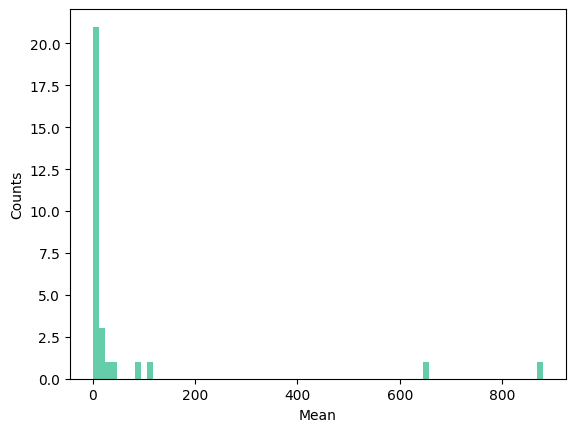

In [6]:
hist = plt.hist(stats.loc['mean'], bins=75, color='#66CDAA')
plt.xlabel('Mean')
plt.ylabel('Counts')
plt.show()

La mayor parte de las columnas toman valores por debajo de 100, sin embargo, algunas columnas toman valores muchos más grandes. Algo parecido sucede con la variabilidad:

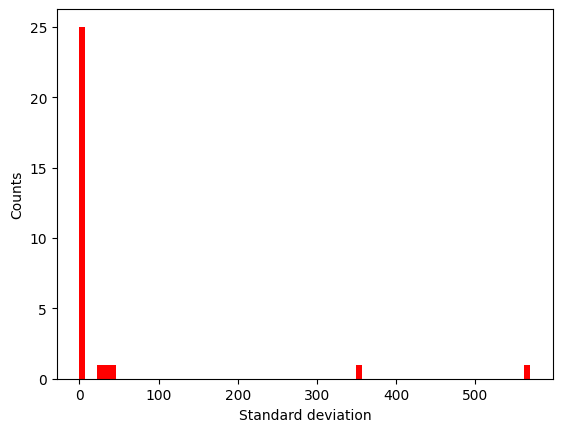

In [7]:
hist = plt.hist(stats.loc['std'], bins=75, color='red')
plt.xlabel('Standard deviation')
plt.ylabel('Counts')
plt.show()

A la hora de realizar el Análisis de Componentes Principales (PCA) tendremos que tener esto en cuenta, ya que diferencias tan grandes entre los rangos de valores que toman las distintas columnas pueden conducir a un resultado erróneo.

Otra forma de ver cómo se distribuyen los datos es utilizar el estimador de densidad de Kernel (KDE), que indica la probabilidad de que los datos tomen ciertos valores. Por ejemplo, para la primera característica de la tabla (tercera columna), la distribución de probabilidad es la siguiente:

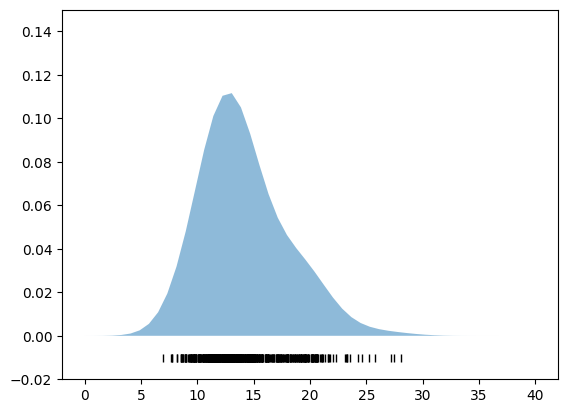

In [8]:
# Seleccionamos la tercera columna de los datos originales
x = wdbc.iloc[:,2].to_numpy()
# Ajustamos los valores del eje x
x_d = np.linspace(0, 40)
# Instanciamos el modelo de KDE, estableciendo un ancho de banda que genera un modelo suave
kde = KernelDensity(bandwidth=2.0, kernel='gaussian')
# Ajustamos el modelo a nuestros datos
kde.fit(x[:, None])
# Calculamos la densidad de probabilidad para los valores de x_d
logprob = kde.score_samples(x_d[:, None])
# Visualizamos el resultado
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.150)
plt.show()

Como podemos observar, se trata de una distribución ligeramente asimétrica, siendo mucho más probable obtener valores cercanos a la media y/o superiores a ésta que valores que se encuentren muy por debajo. 

Por último, evaluamos cuántas de las instancias corresponden a tumores benignos y cuántas a tumores malignos:

In [9]:
# Almacenamos las etiquetas de clase en la variable y, que es un array de ceros y unos
y = (wdbc.values[:,1]=='M').astype(int)
# Guardamos los nombres completos en un array distinto
target_names = np.array([('benign'),('malignant')],dtype='U10') 

print(f"Number of malignant cases = {(target_names[y]=='malignant').sum()}")
print(f"Number of benign cases = {(target_names[y]=='benign').sum()}")

Number of malignant cases = 212
Number of benign cases = 357


### b) Perform a PCA analysis over the data
El Análisis de Componentes Principales (PCA) se emplea para reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad de información posible. 

- En primer lugar, se identifican las direcciones (componentes principales) en las que los datos presentan mayor varianza. Estas direcciones son combinaciones lineales de las variables originales. 

- A continuación, se seleccionan los componentes principales que capturan la mayor parte de la varianza en los datos. 

- Por último, los datos originales se proyectan sobre estos componentes principales, creando un nuevo espacio con menos dimensiones pero que retiene las características esenciales.

La normalización de los datos es imprescindible antes de realizar un PCA, ya que si las variables originales tienen diferentes escalas, aquellas con valores más grandes dominarán el cálculo de la varianza, y las variables con valores más pequeños podrían perder importancia. Al estandarizar los datos, se eliminan las unidades y se pone a todas las características en la misma escala, permitiendo que el PCA capture patrones inherentes en los datos, no simplemente la influencia de magnitudes.

Con el fin de demostrar la necesidad de normalizar los datos, haremos un PCA antes y después de la normalización, de forma que podamos ver cómo afecta al resultado final.

In [10]:
# Almacenamos los datos numéricos sin normalizar
X_arr = wdbc.values[:,2:].astype(float)
X = pd.DataFrame(X_arr)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


La normalización de los datos se puede llevar de forma manual ejecutando el siguiente bloque de código:

In [11]:
# Normalizamos restando la media y dividiendo por la desviación estándar
data = wdbc.copy() 
means = stats.loc['mean'] # Almacenamos las medias
stds = stats.loc['std'] # Almacenamos las desviaciones estándar
for column in range(2, data.shape[1]):
    data.iloc[:,column]=(data.iloc[:,column]-means[column])/stds[column]
    
# Almacenamos los datos numéricos normalizados
X_norm_arr = data.values[:,2:].astype(float)
X_norm = pd.DataFrame(X_norm_arr)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


No obstante, es mucho más sencillo hacerlo de esta forma:

In [12]:
# Estandarizamos los datos
X_norm_arr = StandardScaler().fit_transform(X)
# Almacenamos los datos numéricos normalizados
X_norm = pd.DataFrame(X_norm_arr)
X_norm.head()  

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Una vez tenemos los datos tanto normalizados como sin normalizar, procedemos a determinar cuántas componentes serían necesarias en cada caso para explicar la mayor parte de la varianza de los datos:

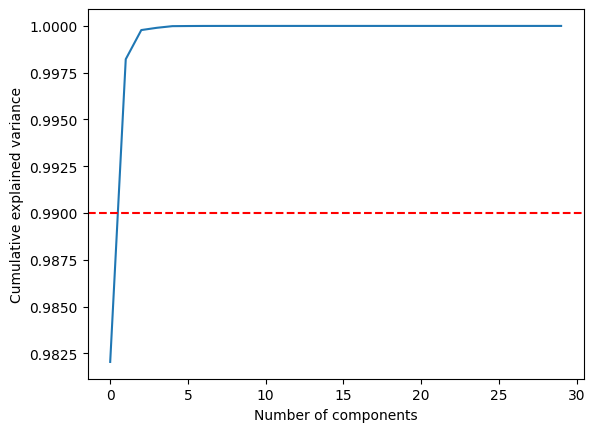

In [13]:
X_pca = PCA().fit(X)

plt.plot(np.cumsum(X_pca.explained_variance_ratio_))
plt.axhline(y=0.99, color='red', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

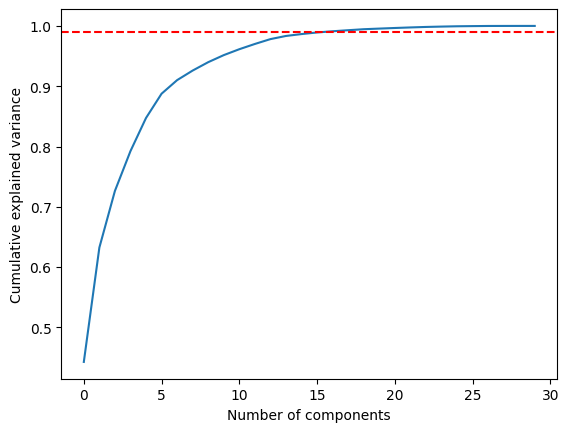

In [14]:
X_norm_pca = PCA().fit(X_norm)

plt.plot(np.cumsum(X_norm_pca.explained_variance_ratio_))
plt.axhline(y=0.99, color='red', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Con los datos sin normalizar, encontramos que con solo 2 componentes estaríamos explicado prácticamente el 100% de la varianza en los datos, mientras que con los datos normalizados necesitaríamos algunas componentes más (alrededor de 15). 

Como comentábamos anteriormente, esta diferencia se debe a que cuando tenemos variables con una varianza elevada respecto al resto, éstas tienen mayor peso a la hora de calcular la varianza explicada por cada componente. 

Procedemos a calcular cuál es el número mínimo de componentes necesarias para explicar el 99% de la varianza en los datos normalizados:

In [15]:
# Calculamos la varianza explicada acumulada
cumulative_expvar = np.cumsum(X_norm_pca.explained_variance_ratio_)

# Número mínimo de componentes para explicar el 99% de la varianza
no_components = np.argmax(cumulative_expvar >= 0.99) + 1

print(f"Número mínimo de componentes necesarias: {no_components}")


Número mínimo de componentes necesarias: 17


Por tanto, podríamos reducir el número de dimensiones de nuestro conjunto de datos de 30 a 17 reteniendo el 99% de la información.

### c) Project the data into the PC space

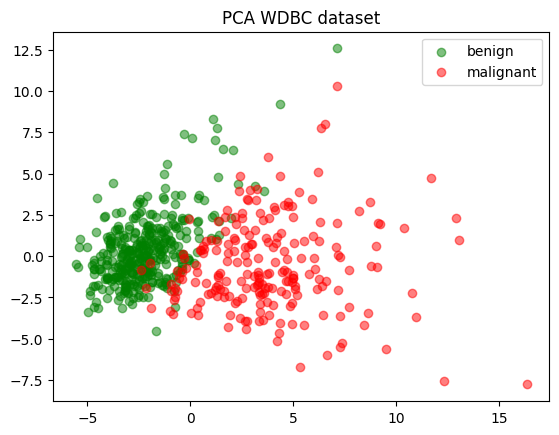

In [16]:
# Reducimos la dimensionalidad de los datos a 17 componentes
X_r = PCA(n_components=17).fit_transform(X_norm)

# Representamos los datos en un espacio de dos dimensiones
plt.figure()
# Componentes a representar (se pueden modificar):
comp1 = 0
comp2 = 1
# Representamos las componentes seleccionadas
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='g', alpha=.5, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='r', alpha=.5, lw=1,
                label='malignant')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')


plt.show()

En esta representación, vemos cómo las células procedentes de tumores benignos son más parecidas entre sí, concentrándose la mayoría en una misma región del espacio. Las células procedentes de tumores malignos, sin embargo, pueden presentar fenotipos muy diferentes, lo que hace que estén más dispersas por el espacio.

Para realizar esta representación hemos seleccionado las 2 primeras componentes, que explican la mayor parte de la varianza, razón por la cual los dos grupos están bien diferenciados. Sin embargo, si seleccionamos otras dos componentes cualesquiera, diferenciar un grupo de otro puede no ser tan sencillo, dado que las componentes aportan cada vez menos información:

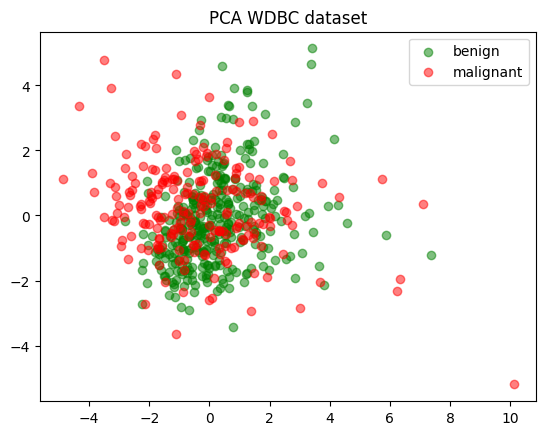

In [17]:
# Reducimos la dimensionalidad de los datos a 17 componentes
X_r = PCA(n_components=17).fit_transform(X_norm)

# Representamos los datos en un espacio de dos dimensiones
plt.figure()
# Componentes a representar (se pueden modificar):
comp3 = 2
comp4 = 3
# Representamos las componentes seleccionadas
plt.scatter(X_r[y == 0, comp3], X_r[y == 0, comp4], color='g', alpha=.5, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp3], X_r[y == 1, comp4], color='r', alpha=.5, lw=1,
                label='malignant')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')


plt.show()

### d) Apply both k-means and GMM over the projected data

K-means y GMM (Gaussian Mixture Model) son algoritmos de aprendizaje no supervisado que tienen como objetivo agrupar los datos de un conjunto en un número predefinido de clusters con características similares. 

Aunque el fin es el mismo, estos algoritmos presentan algunas diferencias:

- K-means utiliza distancias euclidianas para asignar los puntos a los clusters y actualizar los centros, mientras que GMM se basa en la probabilidad de que los datos provengan de cada una de las distribuciones gaussianas (en otras palabras, probabilidad de que pertenezcan a cada uno de los clusters).

- K-means asume que los clusters son esféricos y de tamaño similar, mientras que en GMM los clusters pueden tener cualquier forma (por lo que funciona mejor cuando la distribución de los datos tiene una forma compleja).

Por ello, estos algoritmos pueden arrojar resultados distintos.

En nuestro caso ya conocemos las etiquetas de clase, pero queremos comprobar si pueden predecir correctamente el grupo al que pertenece cada uno de los datos.

Primero aplicaremos K-means, y posteriormente aplicaremos GMM. En ambos casos estableceremos el número de clusters en 2, pues sabemos que nuestros datos se clasifican en tumores benignos y malignos.

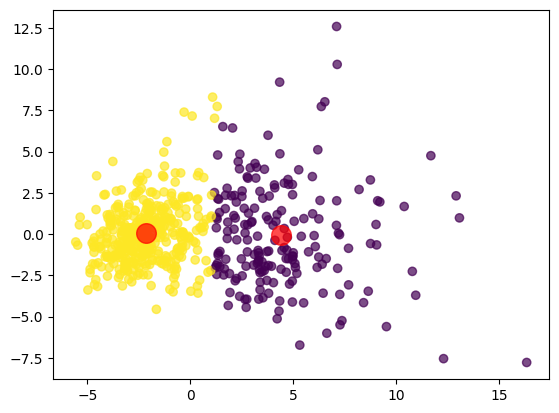

In [18]:
# Aplicamos K-means tras realizar la reducción de dimensionalidad
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_r)
y_kmeans = kmeans.predict(X_r)

# Representamos el resultado en un espacio de dos dimensiones
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)
plt.show()


En esta representación vemos cómo K-means ha sido capaz localizar los clusters correctamente, aunque la asignación de los datos a dichos clusters no coincide del todo con las etiquetas reales de los datos.

Aplicamos entonces GMM para ver si sucede lo mismo:

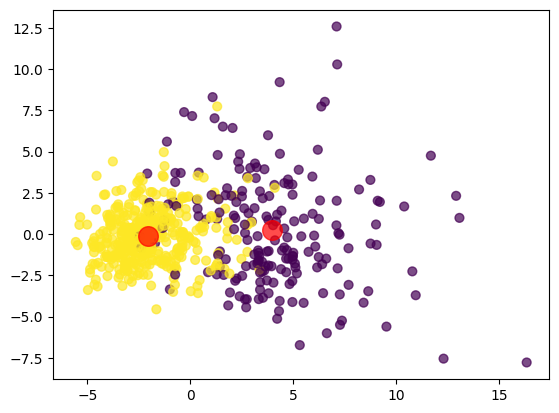

In [27]:
# Aplicamos GMM tras realizar la reducción de dimensionalidad
gmm = GMM(n_components=2).fit(X_r)
y_gmm = gmm.predict(X_r)

# Visualizamos el resultado en un espacio de dos dimensiones
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_gmm, s=40, cmap='viridis', alpha=0.7) 

gmm_means = gmm.means_

plt.scatter(gmm_means[:, 0], gmm_means[:, 1], c='red', s=200, alpha=0.7)
plt.show()


Nuevamente, el algoritmo es capaz de localizar los clusters con éxito, aunque la asignación de los datos a dichos clusters no es del todo correcta.

### e) Compare the obtained clusters with the real labels

Al predecir los grupos con K-means tenemos que:

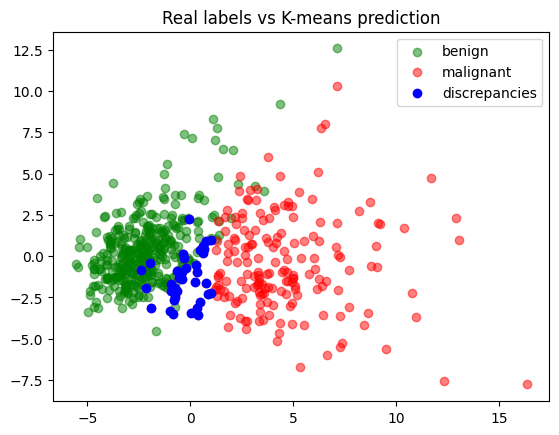

In [20]:
cluster = y & y_kmeans

plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='g', alpha=.5, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp1], X_r [y == 1, comp2], color='r', alpha=.5, lw=1,
                label='malignant')

plt.scatter(X_r[cluster == 1, comp1], X_r[cluster == 1, comp2], color='b', alpha=1, 
            lw=1, label = 'discrepancies')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Real labels vs K-means prediction')

plt.show()

La mayor parte de las etiquetas han sido predichas correctamente, sin embargo, hay algunas diferencias. Todos los errores se concentran en el límite entre ambos grupos, lo que era de esperar ya que K-means asume que los clusters son esféricos y esto no es lo que sucede en realidad.

Por otra parte, al predecir los grupos con GMM tenemos que:

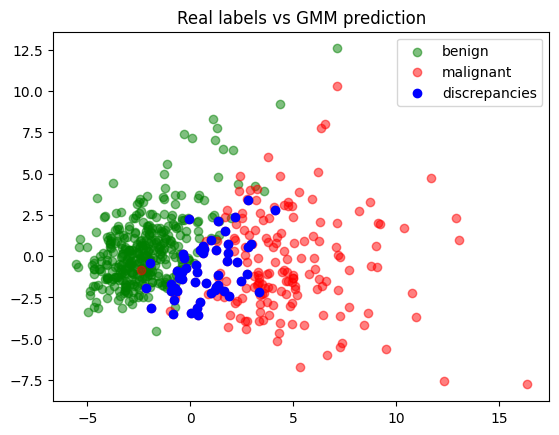

In [28]:
cluster = y & y_gmm

plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='g', alpha=.5, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp1], X_r [y == 1, comp2], color='r', alpha=.5, lw=1,
                label='malignant')

plt.scatter(X_r[cluster == 1, comp1], X_r[cluster == 1, comp2], color='b', alpha=1, 
            lw=1, label = 'discrepancies')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Real labels vs GMM prediction')

plt.show()

Vuelve a haber algunos errores, aunque estos están más dispersos. Esto se debe a que las características de ambos grupos son bastante similares, por lo que la probabilidad de pertenecer a ambos es también parecida y esto puede conducir a una confusión. 

Basándonos en estos resultados, podríamos considerar ambos métodos válidos para predecir las etiquetas de clase de un conjunto de datos similar a éste, teniendo en cuenta que a veces se pueden producir errores.